<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Ejercicio_1_Teor%C3%ADa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import pandas as pd 

# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [29]:
#Primer link de la diapositiva 29 de la Teoría de la clase 2
#La forma de leer los archivos lo saqué del código de Manlio para leer los datos de educación en California


#descargar y guardar el archivo localmente
source_data_url = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv"
sat_file = requests.get(source_data_url)

#Permito la lectura de los datos del URL
url_data=urllib.request.urlopen(source_data_url)


print(sat_file)

<Response [200]>


In [30]:
#Ahora la variable data son los datos dentro del URL
data2=url_data.read().splitlines()


data=pd.read_csv(source_data_url,delimiter=',')

print(data2)
print(data)


[b'fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos', b'2020-06-30,106,29,71,6,574,23,342,2338,181,0', b'2020-07-01,114,31,77,6,581,22,342,2207,172,0', b'2020-07-02,124,40,78,6,588,24,356,2162,176,0', b'2020-07-03,137,53,78,6,606,31,356,2353,190,0', b'2020-07-04,154,70,78,6,622,31,356,2377,214,0', b'2020-07-05,159,74,79,6,635,37,356,1934,181,0', b'2020-07-06,177,91,80,6,646,52,371,1966,247,0', b'2020-07-07,188,97,84,7,669,57,371,2001,252,0', b'2020-07-08,209,109,93,7,687,55,371,2018,242,0', b'2020-07-09,233,130,96,7,710,56,371,1264,297,0', b'2020-07-10,248,141,99,8,728,45,371,1151,197,0', b'2020-07-11,265,158,99,8,744,53,371,1186,228,0', b'2020-07-12,282,171,102,9,758,64,371,1282,246,0', b'2020-07-13,291,178,104,9,886,79,371,1374,264,0', b'2020-07-14,303,189,105,9,911,73,371,1406,228,0', b'2020-07-15,315,198,108,9,972,62,371,1379,219,0', b'2020-07-16,330,202,119,9,996,80,

In [31]:
print(data.columns)

Index(['fecha', 'confirmados', 'activos', 'recuperados', 'decesos',
       'descartados', 'sospechosos', 'contencion_psicologica',
       'monitoreo_epidemiologico', 'aislamiento_por_contacto_estrecho',
       'aprehendidos'],
      dtype='object')


In [47]:
print(data.fecha)



0     2020-06-30
1     2020-07-01
2     2020-07-02
3     2020-07-03
4     2020-07-04
         ...    
83    2020-09-21
84    2020-09-22
85    2020-09-23
86    2020-09-24
87    2020-09-25
Name: fecha, Length: 88, dtype: object


2020-06-30


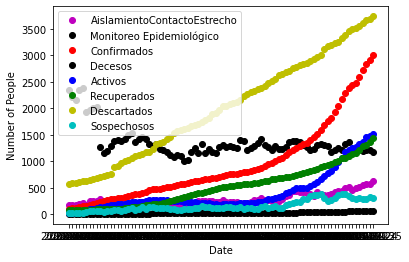

In [55]:
print(data.fecha[0])

plt.plot(data.fecha,data.aislamiento_por_contacto_estrecho ,'mo',label='AislamientoContactoEstrecho')
plt.plot(data.fecha,data.monitoreo_epidemiologico ,'ko',label='Monitoreo Epidemiológico')
plt.plot(data.fecha,data.confirmados ,'ro',label='Confirmados')
plt.plot(data.fecha,data.decesos ,'ko',label='Decesos')
plt.plot(data.fecha,data.activos ,'bo',label='Activos')
plt.plot(data.fecha,data.recuperados ,'go',label='Recuperados')
plt.plot(data.fecha,data.descartados ,'yo',label='Descartados')
plt.plot(data.fecha,data.sospechosos ,'co',label='Sospechosos')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend(loc='upper left')
plt.show()


El número de personas sospechosas y de contacto estrecho es similar

In [79]:
print(data.fecha.size)

confirmados_por_dia=np.zeros(data.fecha.size)
confirmados_por_dia[0]=data.confirmados[0]

recuperados_por_dia=np.zeros(data.fecha.size)
recuperados_por_dia[0]=data.confirmados[0]

#sospechosos_por_dia=np.zeros(data.fecha.size)
descartados_por_dia=np.zeros(data.fecha.size)
decesos_por_dia=np.zeros(data.fecha.size)

for i in np.arange(1,data.fecha.size):
  confirmados_por_dia[i]=data.confirmados[i]-data.confirmados[i-1]
  recuperados_por_dia[i]=data.recuperados[i]-data.recuperados[i-1]
  descartados_por_dia[i]=data.descartados[i]-data.descartados[i-1]
  decesos_por_dia[i]=data.decesos[i]-data.decesos[i-1]
  
  
  #Los sospechosos por día serían, los sospechosos de la lista, menos los del día anterior, mas los descartados del día anterior
  #NO PUEDO CALCULAR LOS SOSPECHOSOS POR DÍA
  #Puedo obtener la diferencia entre un día y otro, y ese sería el número mínimo de sospechosos nuevos en el día. Pero si en el día anterior hubo algún sospechoso que se confirmó oque se descartó
  #no puedo saberlo, y el número de sospecosos del día sería mayor
  #sospechosos_por_dia[i]=data.sospechosos[i]-(data.sospechosos[i]-descartados_por_dia[i-1])


print(confirmados_por_dia)
print(recuperados_por_dia)

print(decesos_por_dia)
#El dia cero tiene muchos confirmados porque ahí comienza el registro, no es que ese día hubo 106 infectados, vienen de antes del 30/6
#Me convendría tomarlo cero, porque no es real
#Lo mismo para recuperados por dia

88
[106.   8.  10.  13.  17.   5.  18.  11.  21.  24.  15.  17.  17.   9.
  12.  12.  15.  15.  26.   3.  11.  16.  28.  22.  16.  14.   4.  11.
  12.  15.  16.  13.  20.   5.  11.  21.  13.   3.  14.  19.   4.  13.
   9.  14.  17.  29.   8.   3.   7.  16.  13.  11.  18.  19.  10.  27.
  26.  40.  34.  27.  36.  20.  61.  52.  40.  41.  39.  30.  14.  60.
  53.  61.  76. 101.  68.  56. 115. 115. 136. 114.  87.  62.  47. 102.
 125. 127.  65. 106.]
[106.   6.   1.   0.   0.   1.   1.   4.   9.   3.   3.   0.   3.   2.
   1.   3.  11.   8.   1.   6.   6.  18.   8.  11.   8.   8.   4.  16.
  13.  32.  13.  20.  14.  19.  19.  21.  14.  15.  15.  14.  13.  18.
  26.  17.  12.  14.  11.   8.   3.   9.  11.  10.   6.  16.   3.  12.
  17.   5.  23.  17.   5.   9.   8.  17.  13.  10.  29.  21.  13.  20.
  14.  21.  32.  33.  16.  23.  24.  32.  42.  16.  36.  27.  25.  50.
  73.  31.  53.  68.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 

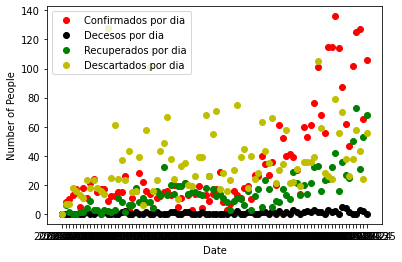

In [82]:
confirmados_por_dia[0]=0
recuperados_por_dia[0]=0

plt.plot(data.fecha,confirmados_por_dia ,'ro',label='Confirmados por dia')
plt.plot(data.fecha,decesos_por_dia ,'ko',label='Decesos por dia')
plt.plot(data.fecha,recuperados_por_dia ,'go',label='Recuperados por dia')
plt.plot(data.fecha,descartados_por_dia ,'yo',label='Descartados por dia')
#plt.plot(data.fecha,data.sospechosos ,'co',label='Sospechosos')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend(loc='upper left')
plt.show()


El número de confirmados por día en los últimos días supera el número de descartados